In [1]:
'''
CS6603 Final Project

Team members:
Brad Dunham (dunhambrad7@gmail.com)
David Strube (dstrube3@gatech.edu)
Brian Chung (bchung41@gatech.edu)
Ilyass Sfar (isfar3@gatech.edu)

'''

# If running for the first time, may need to run one or more of these:
# %pip install --upgrade pip
# !pip install pandas

import time
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import functools

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

df = pd.read_csv('student/student-por.csv', sep=';')
df.dropna(inplace=True) # observation before dropna: 649; after = same
dataset_name = 'Student Performance Data Set'
dataset_source = 'https://archive.ics.uci.edu/ml/datasets/Student+Performance'
regulated_domain = 'Education'
num_observations = df.shape[0]
num_variables = df.shape[1]
dependent_variables = ['G1','G2']
protected_classes = ['age','sex']

print('Step 1:\n')
print('● Which dataset did you select?')
print(dataset_name + ' - ' + dataset_source)
print()

print('● Which regulated domain does your dataset belong to?')
print(regulated_domain)
print()

print('● How many observations are in the dataset?')
print(num_observations)
# print('data length, post dropna: ' + str(len(data.index)))  # still 649
print()

print('● How many variables are in the dataset?')
print(num_variables)
print()

print('● Which variables did you select as your dependent variables?')
print(dependent_variables)
print()

print('● How many and which variables in the dataset are associated with a legally recognized protected class?') 
print('\tWhich legal precedence/law (as discussed in the lectures) does each protected class fall under?')
print(len(protected_classes))
print(protected_classes[0] + ' - Age Discrimination in Employment Act of 1967')
print(protected_classes[1] + ' - Equal Pay Act of 1963; Civil Rights Act of 1964, 1991')
print()

Step 1:

● Which dataset did you select?
Student Performance Data Set - https://archive.ics.uci.edu/ml/datasets/Student+Performance

● Which regulated domain does your dataset belong to?
Education

● How many observations are in the dataset?
649

● How many variables are in the dataset?
33

● Which variables did you select as your dependent variables?
['G1', 'G2']

● How many and which variables in the dataset are associated with a legally recognized protected class?
	Which legal precedence/law (as discussed in the lectures) does each protected class fall under?
2
age - Age Discrimination in Employment Act of 1967
sex - Equal Pay Act of 1963; Civil Rights Act of 1964, 1991



In [2]:
def group_G1_score (row):
    if row['G1'] < 6:
        return 'VeryLow'
    if row['G1'] < 11:
        return 'Low'
    if row['G1'] < 16 :
        return 'Medium'
    return 'High'

def group_G2_score (row):
    if row['G2'] < 6:
        return 'VeryLow'
    if row['G2'] < 11:
        return 'Low'
    if row['G2'] < 16 :
        return 'Medium'
    return 'High'

def group_G1_score_sex_transform (row):
    if row['sex'] == 'F':
        return row['G1_Group']
    if row['G1'] < 5:
        return 'VeryLow'
    if row['G1'] < 10:
        return 'Low'
    if row['G1'] < 15:
        return 'Medium'
    return 'High'

def group_G2_score_sex_transform (row):
    if row['sex'] == 'F':
        return row['G2_Group']
    if row['G2'] < 5:
        return 'VeryLow'
    if row['G2'] < 10:
        return 'Low'
    if row['G2'] < 15:
        return 'Medium'
    return 'High'

def group_G1_score_age_transform (row):
    if row['agegroup'] == 'under18':
        return row['G1_Group']
    if row['G1'] < 5:
        return 'VeryLow'
    if row['G1'] < 10:
        return 'Low'
    if row['G1'] < 15:
        return 'Medium'
    return 'High'

def group_G2_score_age_transform (row):
    if row['agegroup'] == 'under18':
        return row['G2_Group']
    if row['G2'] < 5:
        return 'VeryLow'
    if row['G2'] < 10:
        return 'Low'
    if row['G2'] < 15:
        return 'Medium'
    return 'High'

# create grouped age column, 2 groups under 18 - 18 and older
df['agegroup'] = np.where(df['age']<18, 'under18', '18andolder')

# add columns that group G1 and G2 scores into 4 groups, very low - low - medium - high
df['G1_Group'] = df.apply (lambda row: group_G1_score(row), axis=1)
df['G2_Group'] = df.apply (lambda row: group_G2_score(row), axis=1)

# add columns that group G1 and G2 scores into 4 groups shifted for males and over18 groups to remove bias
df['G1_Group_Sex_Transform'] = df.apply (lambda row: group_G1_score_sex_transform(row), axis=1)
df['G2_Group_Sex_Transform'] = df.apply (lambda row: group_G2_score_sex_transform(row), axis=1)
df['G1_Group_Age_Transform'] = df.apply (lambda row: group_G1_score_age_transform(row), axis=1)
df['G2_Group_Age_Transform'] = df.apply (lambda row: group_G2_score_age_transform(row), axis=1)

Step 2:

● Table documenting the relationship between members and membership categories for each protected class variable
	(from Step 2.1)
          Class  Members
0        Female      383
1          Male      266
2      Under 18      468
3  18 and Older      181

● Table documenting the relationship between values and discrete categories/numerical values associated with your
	dependent variables (from Step 2.2)
       Dependent Varibale Groups  Count
0     G1 1st Period Grade - High     46
1      G1 1st Period Grade - Low    244
2   G1 1st Period Grade - Medium    351
3  G1 1st Period Grade - VeryLow      8
4     G2 2nd Period Grade - High     60
5      G2 2nd Period Grade - Low    218
6   G2 2nd Period Grade - Medium    361
7  G2 2nd Period Grade - VeryLow     10

● Table providing the computed frequency values for the membership categories each protected class variable
	(from Step 2.3)
          Class  Frequency %
0        Female    59.013867
1          Male    40.986133
2      Unde

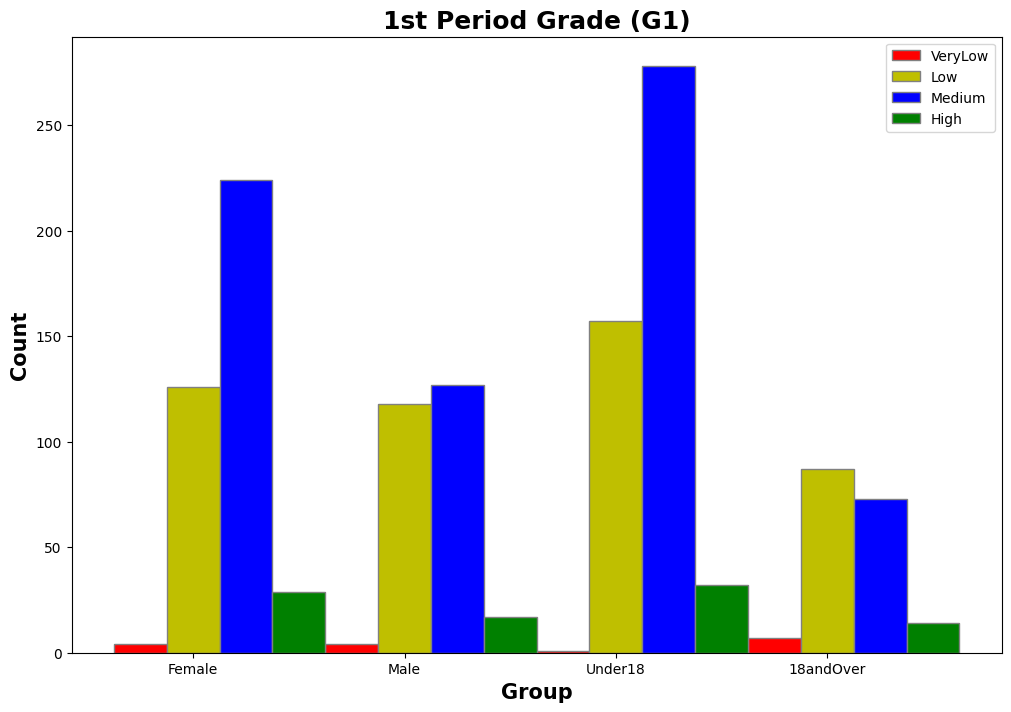

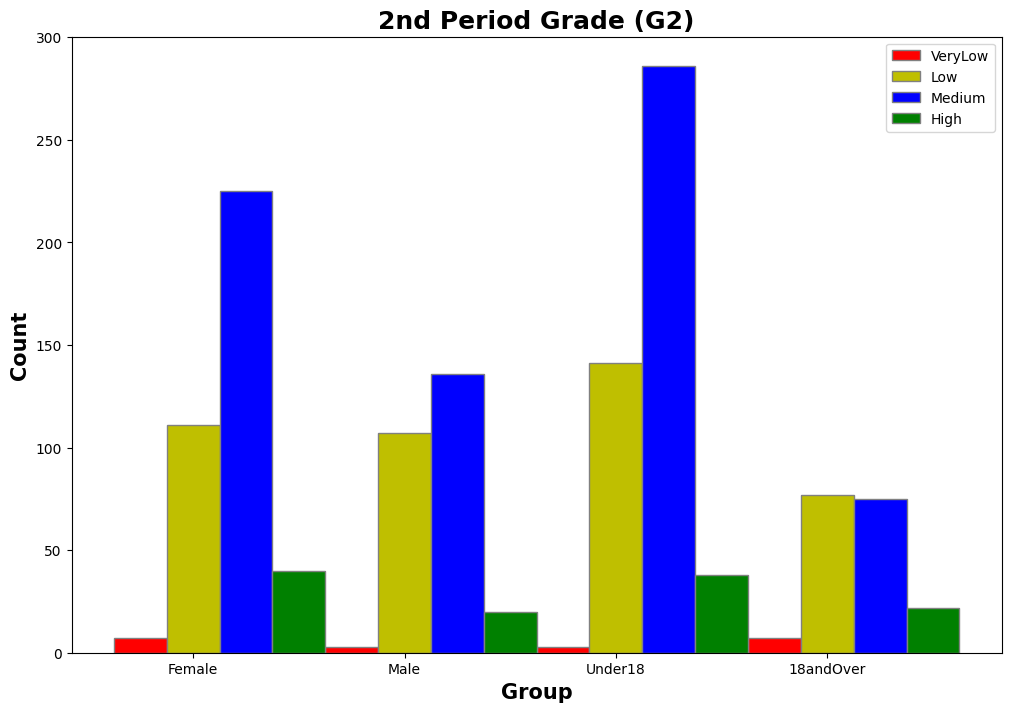

In [3]:
print('Step 2:\n')

print('● Table documenting the relationship between members and membership categories for each protected class variable')
print('\t(from Step 2.1)')
data = [['Female', df['sex'].value_counts()[0]], ['Male', df['sex'].value_counts()[1]], ['Under 18', df['agegroup'].value_counts()[0]], ['18 and Older', df['agegroup'].value_counts()[1]]]
df_table1 = pd.DataFrame(data, columns=["Class", "Members"])
print(df_table1)
print()

print('● Table documenting the relationship between values and discrete categories/numerical values associated with your')
print('\tdependent variables (from Step 2.2)')
data = [['G1 1st Period Grade - High', df['G1_Group'].value_counts().sort_index()[0]], ['G1 1st Period Grade - Low', df['G1_Group'].value_counts().sort_index()[1]], ['G1 1st Period Grade - Medium', df['G1_Group'].value_counts().sort_index()[2]], ['G1 1st Period Grade - VeryLow', df['G1_Group'].value_counts().sort_index()[3]], ['G2 2nd Period Grade - High', df['G2_Group'].value_counts().sort_index()[0]], ['G2 2nd Period Grade - Low', df['G2_Group'].value_counts().sort_index()[1]], ['G2 2nd Period Grade - Medium', df['G2_Group'].value_counts().sort_index()[2]], ['G2 2nd Period Grade - VeryLow', df['G2_Group'].value_counts().sort_index()[3]]]
df_table2 = pd.DataFrame(data, columns=["Dependent Varibale Groups", "Count"])
print(df_table2)
print()

print('● Table providing the computed frequency values for the membership categories each protected class variable') 
print('\t(from Step 2.3)')
rowCount = df.shape[0]
data = [['Female', (df['sex'].value_counts()[0] / rowCount)*100], ['Male', (df['sex'].value_counts()[1] / rowCount)*100], ['Under 18', (df['agegroup'].value_counts()[0] / rowCount)*100], ['18 and Older', (df['agegroup'].value_counts()[1] / rowCount)*100]]
df_table3 = pd.DataFrame(data, columns=["Class", "Frequency %"])
print(df_table3)
print()

        
print('● Histograms derived from Step 2.4')
# Step 2.4 create histogram groups
sex_g1 = df.value_counts(['sex', 'G1_Group']).sort_index()
agegroup_g1 = df.value_counts(['agegroup', 'G1_Group']).sort_index()
sex_g2 = df.value_counts(['sex', 'G2_Group']).sort_index()
agegroup_g2 = df.value_counts(['agegroup', 'G2_Group']).sort_index()
sex_g1_transformed = df.value_counts(['sex', 'G1_Group_Sex_Transform']).sort_index()
agegroup_g1_transformed = df.value_counts(['agegroup', 'G1_Group_Age_Transform']).sort_index()
sex_g2_transformed = df.value_counts(['sex', 'G2_Group_Sex_Transform']).sort_index()
agegroup_g2_transformed = df.value_counts(['agegroup', 'G2_Group_Age_Transform']).sort_index()

# Step 2.4 create histogram for G1
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

VeryLow = [sex_g1[3], sex_g1[7], agegroup_g1[7], agegroup_g1[3]]
Low = [sex_g1[1], sex_g1[5], agegroup_g1[5], agegroup_g1[1]]
Medium = [sex_g1[2], sex_g1[6], agegroup_g1[6], agegroup_g1[2]]
High = [sex_g1[0], sex_g1[4], agegroup_g1[4], agegroup_g1[0]]
 
# Set position of bar on X axis
br1 = np.arange(len(VeryLow))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, VeryLow, color ='r', width = barWidth,
        edgecolor ='grey', label ='VeryLow')
plt.bar(br2, Low, color ='y', width = barWidth,
        edgecolor ='grey', label ='Low')
plt.bar(br3, Medium, color ='b', width = barWidth,
        edgecolor ='grey', label ='Medium')
plt.bar(br4, High, color ='g', width = barWidth,
        edgecolor ='grey', label ='High')
 
# Adding Xticks
plt.xlabel('Group', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(VeryLow))],
        ['Female', 'Male', 'Under18', '18andOver'])

plt.title('1st Period Grade (G1)', fontweight ='bold', fontsize = 18)
plt.legend()
plt.show()
plt.close()

# Step 2.4 create histogram for G2
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

VeryLow = [sex_g2[3], sex_g2[7], agegroup_g2[7], agegroup_g2[3]]
Low = [sex_g2[1], sex_g2[5], agegroup_g2[5], agegroup_g2[1]]
Medium = [sex_g2[2], sex_g2[6], agegroup_g2[6], agegroup_g2[2]]
High = [sex_g2[0], sex_g2[4], agegroup_g2[4], agegroup_g2[0]]
 
# Set position of bar on X axis
br1 = np.arange(len(VeryLow))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, VeryLow, color ='r', width = barWidth,
        edgecolor ='grey', label ='VeryLow')
plt.bar(br2, Low, color ='y', width = barWidth,
        edgecolor ='grey', label ='Low')
plt.bar(br3, Medium, color ='b', width = barWidth,
        edgecolor ='grey', label ='Medium')
plt.bar(br4, High, color ='g', width = barWidth,
        edgecolor ='grey', label ='High')
 
# Adding Xticks
plt.xlabel('Group', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(VeryLow))],
        ['Female', 'Male', 'Under18', '18andOver'])

plt.title('2nd Period Grade (G2)', fontweight ='bold', fontsize = 18)
plt.legend()
plt.show()
plt.close()
print()

In [4]:
def stat_par_diff (unpriv_pos, priv_pos, unpriv_neg, priv_neg):
    return (unpriv_pos / priv_pos) - ((unpriv_pos + unpriv_neg) / (priv_pos + priv_neg))

def disp_impact (unpriv_pos, priv_pos, unpriv_neg, priv_neg):
    return (unpriv_pos / (unpriv_pos + unpriv_neg)) / (priv_pos / (priv_pos + priv_neg))

# for G1 combine very low and low into negative group, combine medium and high into positive group
female_negative_g1 = sex_g1[3] + sex_g1[1]
female_positive_g1 = sex_g1[2] + sex_g1[0]
male_negative_g1 = sex_g1[7] + sex_g1[5]
male_positive_g1 = sex_g1[6] + sex_g1[4]
under18_negative_g1 = agegroup_g1[7] + agegroup_g1[5]
under18_positive_g1 = agegroup_g1[6] + agegroup_g1[4]
over18_negative_g1 = agegroup_g1[3] + agegroup_g1[1]
over18_positive_g1 = agegroup_g1[2] + agegroup_g1[0]

female_negative_g1_transformed = sex_g1_transformed[3] + sex_g1_transformed[1]
female_positive_g1_transformed = sex_g1_transformed[2] + sex_g1_transformed[0]
male_negative_g1_transformed = sex_g1_transformed[7] + sex_g1_transformed[5]
male_positive_g1_transformed = sex_g1_transformed[6] + sex_g1_transformed[4]
under18_negative_g1_transformed = agegroup_g1_transformed[7] + agegroup_g1_transformed[5]
under18_positive_g1_transformed = agegroup_g1_transformed[6] + agegroup_g1_transformed[4]
over18_negative_g1_transformed = agegroup_g1_transformed[3] + agegroup_g1_transformed[1]
over18_positive_g1_transformed = agegroup_g1_transformed[2] + agegroup_g1_transformed[0]

stat_par_diff_sex_g1 = stat_par_diff(male_positive_g1, female_positive_g1, male_negative_g1, female_negative_g1)
stat_par_diff_sex_g1_transformed = stat_par_diff(male_positive_g1_transformed, female_positive_g1_transformed, male_negative_g1_transformed, female_negative_g1_transformed)
disparate_impact_sex_g1 = disp_impact(male_positive_g1, female_positive_g1, male_negative_g1, female_negative_g1)
disparate_impact_sex_g1_transformed = disp_impact(male_positive_g1_transformed, female_positive_g1_transformed, male_negative_g1_transformed, female_negative_g1_transformed)
stat_par_diff_age_g1 = stat_par_diff(over18_positive_g1, under18_positive_g1, over18_negative_g1, under18_negative_g1)
stat_par_diff_age_g1_transformed = stat_par_diff(over18_positive_g1_transformed, under18_positive_g1_transformed, over18_negative_g1_transformed, under18_negative_g1_transformed)
disparate_impact_age_g1 = disp_impact(over18_positive_g1, under18_positive_g1, over18_negative_g1, under18_negative_g1)
disparate_impact_age_g1_transformed = disp_impact(over18_positive_g1_transformed, under18_positive_g1_transformed, over18_negative_g1_transformed, under18_negative_g1_transformed)

# for G2 combine very low and low into negative group, combine medium and high into positive group
female_negative_g2 = sex_g2[3] + sex_g2[1]
female_positive_g2 = sex_g2[2] + sex_g2[0]
male_negative_g2 = sex_g2[7] + sex_g2[5]
male_positive_g2 = sex_g2[6] + sex_g2[4]
under18_negative_g2 = agegroup_g2[7] + agegroup_g2[5]
under18_positive_g2 = agegroup_g2[6] + agegroup_g2[4]
over18_negative_g2 = agegroup_g2[3] + agegroup_g2[1]
over18_positive_g2 = agegroup_g2[2] + agegroup_g2[0]

female_negative_g2_transformed = sex_g2_transformed[3] + sex_g2_transformed[1]
female_positive_g2_transformed = sex_g2_transformed[2] + sex_g2_transformed[0]
male_negative_g2_transformed = sex_g2_transformed[7] + sex_g2_transformed[5]
male_positive_g2_transformed = sex_g2_transformed[6] + sex_g2_transformed[4]
under18_negative_g2_transformed = agegroup_g2_transformed[7] + agegroup_g2_transformed[5]
under18_positive_g2_transformed = agegroup_g2_transformed[6] + agegroup_g2_transformed[4]
over18_negative_g2_transformed = agegroup_g2_transformed[3] + agegroup_g2_transformed[1]
over18_positive_g2_transformed = agegroup_g2_transformed[2] + agegroup_g2_transformed[0]

stat_par_diff_sex_g2 = stat_par_diff(male_positive_g2, female_positive_g2, male_negative_g2, female_negative_g2)
stat_par_diff_sex_g2_transformed = stat_par_diff(male_positive_g2_transformed, female_positive_g2_transformed, male_negative_g2_transformed, female_negative_g2_transformed)
disparate_impact_sex_g2 = disp_impact(male_positive_g2, female_positive_g2, male_negative_g2, female_negative_g2)
disparate_impact_sex_g2_transformed = disp_impact(male_positive_g2_transformed, female_positive_g2_transformed, male_negative_g2_transformed, female_negative_g2_transformed)
stat_par_diff_age_g2 = stat_par_diff(over18_positive_g2, under18_positive_g2, over18_negative_g2, under18_negative_g2)
stat_par_diff_age_g2_transformed = stat_par_diff(over18_positive_g2_transformed, under18_positive_g2_transformed, over18_negative_g2_transformed, under18_negative_g2_transformed)
disparate_impact_age_g2 = disp_impact(over18_positive_g2, under18_positive_g2, over18_negative_g2, under18_negative_g2)
disparate_impact_age_g2_transformed = disp_impact(over18_positive_g2_transformed, under18_positive_g2_transformed, over18_negative_g2_transformed, under18_negative_g2_transformed)

In [5]:
print('Step 3:\n')

print('● Privileged/unprivileged groups associated with each protected class variable:')
print('\tSex Privileged Group:  Female')
print('\tSex Unprivileged Group:  Male')
print('\tAge Privileged Group:  Under 18')
print('\tAge Unprivileged Group:  18 and Older')
print()

print('● Table documenting the protected class variable selected, the privileged/unprivileged groups/values, the pre-processing bias mitigation function selected, and the fairness metrics/resulting values computed in Step 3.2 and Step 3.4')
data = [['Sex', stat_par_diff_sex_g1, stat_par_diff_sex_g1_transformed, disparate_impact_sex_g1, disparate_impact_sex_g1_transformed, stat_par_diff_sex_g2, stat_par_diff_sex_g2_transformed, disparate_impact_sex_g2, disparate_impact_sex_g2_transformed], ['Age', stat_par_diff_age_g1, stat_par_diff_age_g1_transformed, disparate_impact_age_g1, disparate_impact_age_g1_transformed, stat_par_diff_age_g2, stat_par_diff_age_g2_transformed, disparate_impact_age_g2, disparate_impact_age_g2_transformed]]
df_table4 = pd.DataFrame(data, columns=["Class", "Stat Par Diff G1", "Stat Par Diff G1 Bias Mitigated", "Disp Impact G1", "Disp Impact G1 Bias Mitigated", "Stat Par Diff G2", "Stat Par Diff G2 Bias Mitigated", "Disp Impact G2", "Disp Impact G2 Bias Mitigated"])
print('\tPre-processing bias mitigation function selected: Reweighting')
print()
print(df_table4)
print()

Step 3:

● Privileged/unprivileged groups associated with each protected class variable:
	Sex Privileged Group:  Female
	Sex Unprivileged Group:  Male
	Age Privileged Group:  Under 18
	Age Unprivileged Group:  18 and Older

● Table documenting the protected class variable selected, the privileged/unprivileged groups/values, the pre-processing bias mitigation function selected, and the fairness metrics/resulting values computed in Step 3.2 and Step 3.4
	Pre-processing bias mitigation function selected: Reweighting

  Class  Stat Par Diff G1  Stat Par Diff G1 Bias Mitigated  Disp Impact G1  \
0   Sex         -0.125347                         0.056471        0.819519   
1   Age         -0.106107                        -0.006107        0.725646   

   Disp Impact G1 Bias Mitigated  Stat Par Diff G2  \
0                        1.08131         -0.105838   
1                        0.98421         -0.087369   

   Stat Par Diff G2 Bias Mitigated  Disp Impact G2  \
0                         0.

In [6]:
# split your original dataset into training and testing datasets
half_df = len(df) // 2
df_training = df.iloc[:half_df]
df_testing = df.iloc[half_df:]

# Apply your bias mitigation algorithm to your original testing dataset in order to produce a transformed testing
# dataset; select one of your protected class variables and one of your dependent variables as the output label
def group_G1_score_step4_transform (row):
    if row['internet'] == 'no':
        return row['G1_Group']
    if row['G1'] < 5:
        return 'VeryLow'
    if row['G1'] < 10:
        return 'Low'
    if row['G1'] < 15:
        return 'Medium'
    return 'High'


# add columns that group G1 scores into 4 groups shifted for internet access to remove bias
df_testing['G1_Group_Step4_Transform'] = df.apply (lambda row: group_G1_score_step4_transform(row), axis=1)

sex_g1_step4 = df_testing.value_counts(['sex', 'G1_Group']).sort_index()
agegroup_g1_step4 = df_testing.value_counts(['agegroup', 'G1_Group']).sort_index()
sex_g1_step4_transformed = df_testing.value_counts(['sex', 'G1_Group_Step4_Transform']).sort_index()
agegroup_g1_step4_transformed = df_testing.value_counts(['agegroup', 'G1_Group_Step4_Transform']).sort_index()

# for G1 combine very low and low into negative group, combine medium and high into positive group
female_negative_g1_step4 = sex_g1_step4[3] + sex_g1_step4[1]
female_positive_g1_step4 = sex_g1_step4[2] + sex_g1_step4[0]
male_negative_g1_step4 = sex_g1_step4[7] + sex_g1_step4[5]
male_positive_g1_step4 = sex_g1_step4[6] + sex_g1_step4[4]
under18_negative_g1_step4 = agegroup_g1_step4[7] + agegroup_g1_step4[5]
under18_positive_g1_step4 = agegroup_g1_step4[6] + agegroup_g1_step4[4]
over18_negative_g1_step4 = agegroup_g1_step4[3] + agegroup_g1_step4[1]
over18_positive_g1_step4 = agegroup_g1_step4[2] + agegroup_g1_step4[0]

female_negative_g1_step4_transformed = sex_g1_step4_transformed[3] + sex_g1_step4_transformed[1]
female_positive_g1_step4_transformed = sex_g1_step4_transformed[2] + sex_g1_step4_transformed[0]
male_negative_g1_step4_transformed = sex_g1_step4_transformed[7] + sex_g1_step4_transformed[5]
male_positive_g1_step4_transformed = sex_g1_step4_transformed[6] + sex_g1_step4_transformed[4]
under18_negative_g1_step4_transformed = agegroup_g1_step4_transformed[7] + agegroup_g1_step4_transformed[5]
under18_positive_g1_step4_transformed = agegroup_g1_step4_transformed[6] + agegroup_g1_step4_transformed[4]
over18_negative_g1_step4_transformed = agegroup_g1_step4_transformed[3] + agegroup_g1_step4_transformed[1]
over18_positive_g1_step4_transformed = agegroup_g1_step4_transformed[2] + agegroup_g1_step4_transformed[0]

stat_par_diff_sex_g1_step4 = stat_par_diff(male_positive_g1_step4, female_positive_g1_step4, male_negative_g1_step4, female_negative_g1_step4)
stat_par_diff_sex_g1_step4_transformed = stat_par_diff(male_positive_g1_step4_transformed, female_positive_g1_step4_transformed, male_negative_g1_step4_transformed, female_negative_g1_step4_transformed)
disparate_impact_sex_g1_step4 = disp_impact(male_positive_g1_step4, female_positive_g1_step4, male_negative_g1_step4, female_negative_g1_step4)
disparate_impact_sex_g1_step4_transformed = disp_impact(male_positive_g1_step4_transformed, female_positive_g1_step4_transformed, male_negative_g1_step4_transformed, female_negative_g1_step4_transformed)
stat_par_diff_age_g1_step4 = stat_par_diff(over18_positive_g1_step4, under18_positive_g1_step4, over18_negative_g1_step4, under18_negative_g1_step4)
stat_par_diff_age_g1_step4_transformed = stat_par_diff(over18_positive_g1_step4_transformed, under18_positive_g1_step4_transformed, over18_negative_g1_step4_transformed, under18_negative_g1_step4_transformed)
disparate_impact_age_g1_step4 = disp_impact(over18_positive_g1_step4, under18_positive_g1_step4, over18_negative_g1_step4, under18_negative_g1_step4)
disparate_impact_age_g1_step4_transformed = disp_impact(over18_positive_g1_step4_transformed, under18_positive_g1_step4_transformed, over18_negative_g1_step4_transformed, under18_negative_g1_step4_transformed)

/var/folders/15/5vtt9tpn6c98kpsc0frpxz140000gn/T/ipykernel_16873/375326876.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['G1_Group_Step4_Transform'] = df.apply (lambda row: group_G1_score_step4_transform(row), axis=1)


In [7]:
print('Step 4:\n')
print('Option B:\n')

print('1) The privileged/unprivileged groups')
print('\tSex Privileged Group:  Female')
print('\tSex Unprivileged Group:  Male')
print('\tAge Privileged Group:  Under 18')
print('\tAge Unprivileged Group:  18 and Older')
print()
print('2) The dependent variable')
print('\tDependent Variable:  G1')
print()
print('3/4) The quantitative results from applying the two fairness metrics associated with the original testing dataset and transformed testing dataset after bias mitigation,')
print('A table documenting whether there was positive, negative, or no change in each of the fairness metrics on the transformed dataset from Step 3.4, the original testing dataset (Step 4.5), and on the transformed dataset after applying your bias mitigation algorithm (Step 4.5)')
print()
data = [['Sex', stat_par_diff_sex_g1_step4, stat_par_diff_sex_g1_step4_transformed, disparate_impact_sex_g1_step4, disparate_impact_sex_g1_step4_transformed], ['Age', stat_par_diff_age_g1_step4, stat_par_diff_age_g1_step4_transformed, disparate_impact_age_g1_step4, disparate_impact_age_g1_step4_transformed]]
df_table5 = pd.DataFrame(data, columns=["Class", "Stat Par Diff G1", "Stat Par Diff G1 Bias Mitigated", "Disp Impact G1", "Disp Impact G1 Bias Mitigated"])
print()
print(df_table5)
print()

Step 4:

Option B:

1) The privileged/unprivileged groups
	Sex Privileged Group:  Female
	Sex Unprivileged Group:  Male
	Age Privileged Group:  Under 18
	Age Unprivileged Group:  18 and Older

2) The dependent variable
	Dependent Variable:  G1

3/4) The quantitative results from applying the two fairness metrics associated with the original testing dataset and transformed testing dataset after bias mitigation,
A table documenting whether there was positive, negative, or no change in each of the fairness metrics on the transformed dataset from Step 3.4, the original testing dataset (Step 4.5), and on the transformed dataset after applying your bias mitigation algorithm (Step 4.5)


  Class  Stat Par Diff G1  Stat Par Diff G1 Bias Mitigated  Disp Impact G1  \
0   Sex         -0.109290                        -0.065866        0.794960   
1   Age         -0.083938                        -0.088700        0.877273   

   Disp Impact G1 Bias Mitigated  
0                       0.876429  
1    

In [8]:
def stat_par_diff_plot (stat_par_diff, y_label, title):
    stat_par_diff_list = [stat_par_diff]
    plt.ylabel(y_label)
    plt.bar(1, stat_par_diff_list)
    plt.xticks([1], [y_label])
    plt.hlines(y=0.2, xmin=0, xmax=2, color='r', label="bias")
    plt.hlines(y=-0.2, xmin=0, xmax=2, color='r')
    plt.hlines(y=0.0, xmin=0, xmax=2, color='b', label="fair")
    plt.legend()
    # #     plt.savefig(title)
    plt.show()
    plt.close()
    return

def disp_impact_plot (disp_impact, y_label, title):
    disparate_impact_list = [disp_impact]
    plt.ylabel(y_label)
    plt.bar(1, disparate_impact_list)
    plt.xticks([1], [y_label])
    plt.hlines(y=0.8, xmin=0, xmax=2, color='r', label="bias")
    plt.hlines(y=1.2, xmin=0, xmax=2, color='r')
    plt.hlines(y=1.0, xmin=0, xmax=2, color='b', label="fair")
    plt.legend()
    #     plt.savefig(title)
    plt.show()
    plt.close()
    return

Step 5:
Team members:
Brad Dunham (dunhambrad7@gmail.com)
David Strube (dstrube3@gatech.edu)
Brian Chung (bchung41@gatech.edu)
Ilyass Sfar (isfar3@gatech.edu)


Graph the results from applying the two fairness metrics on your privileged/unprivileged groups as derived from Step 3.2, 3.4, and 4.5


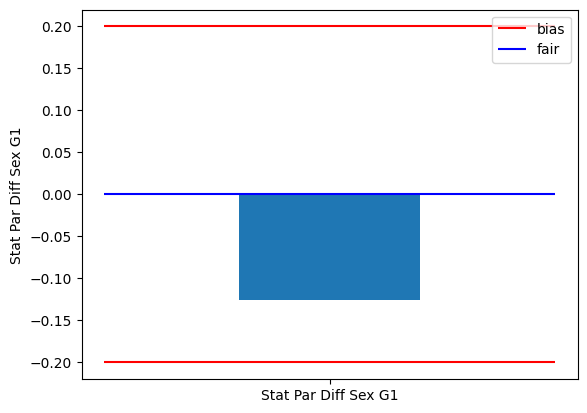

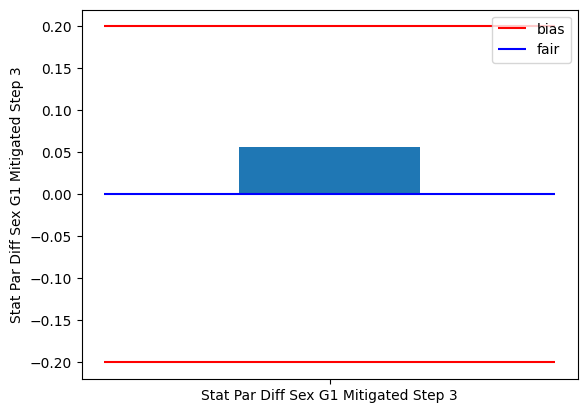

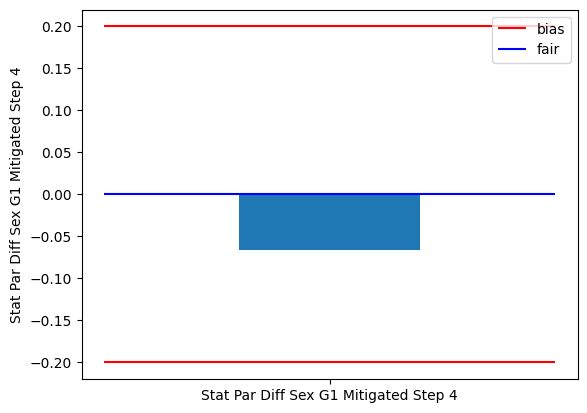

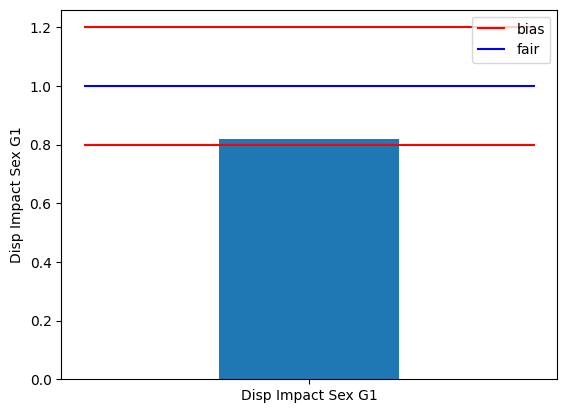

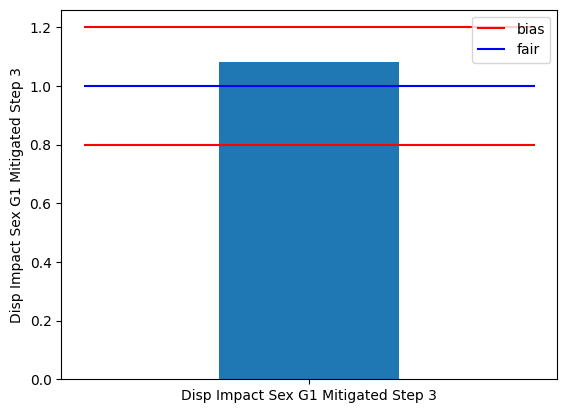

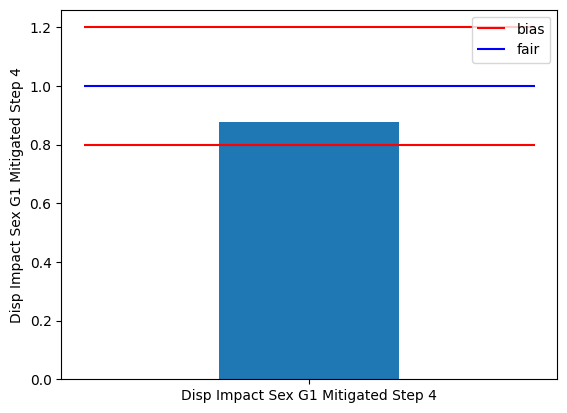

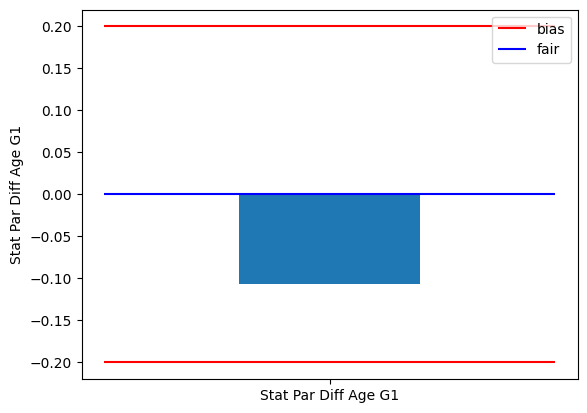

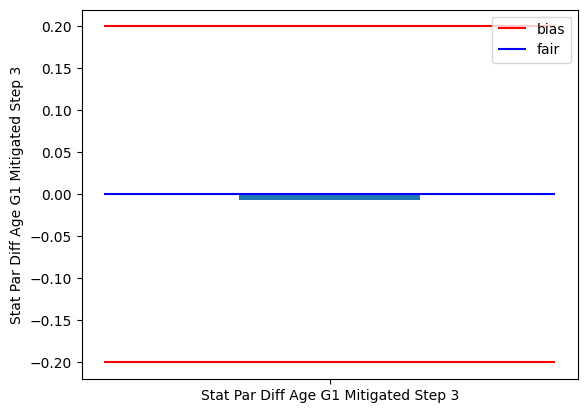

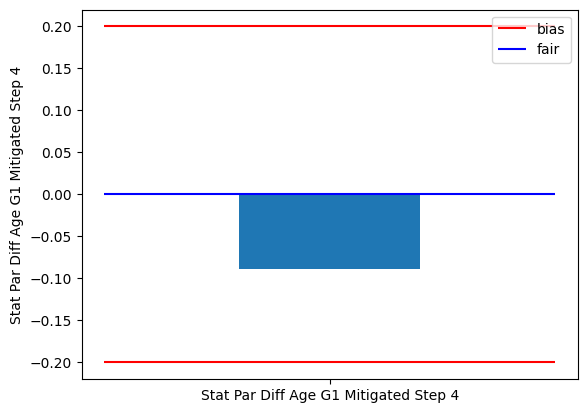

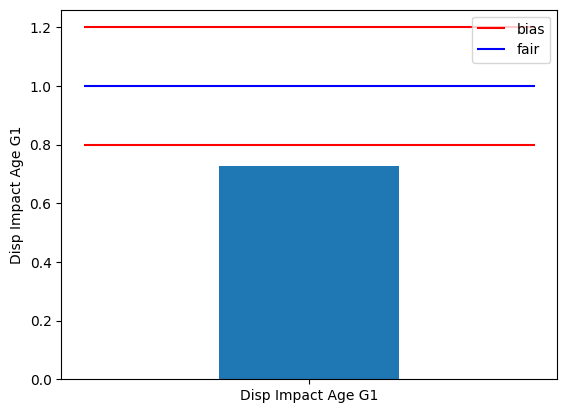

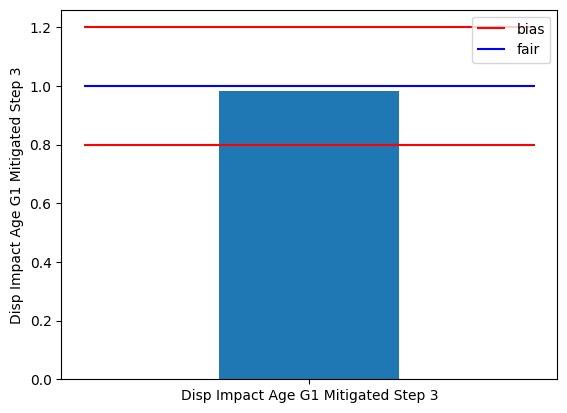

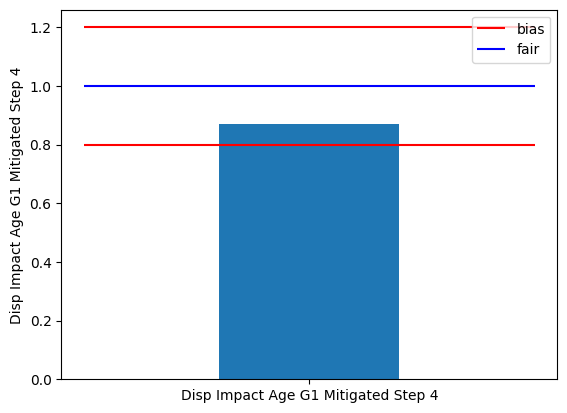

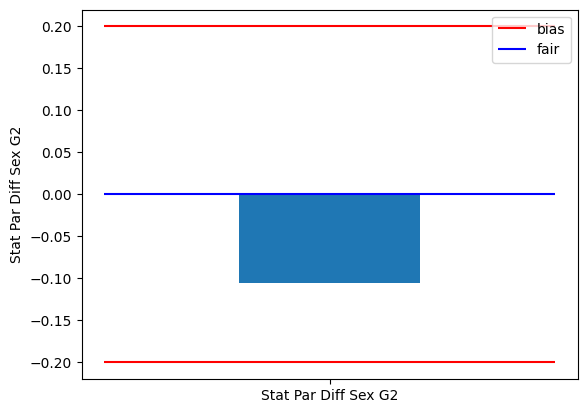

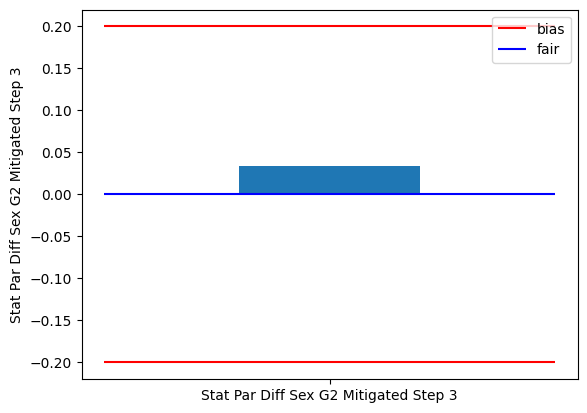

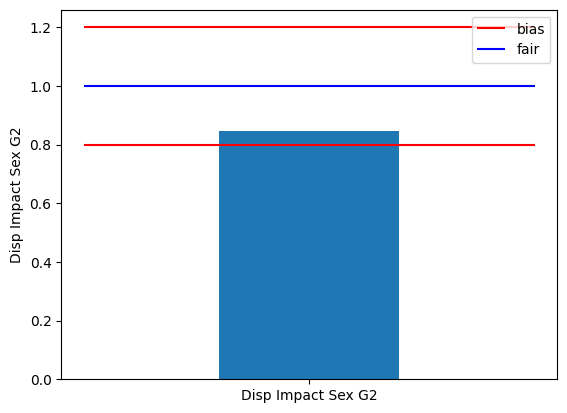

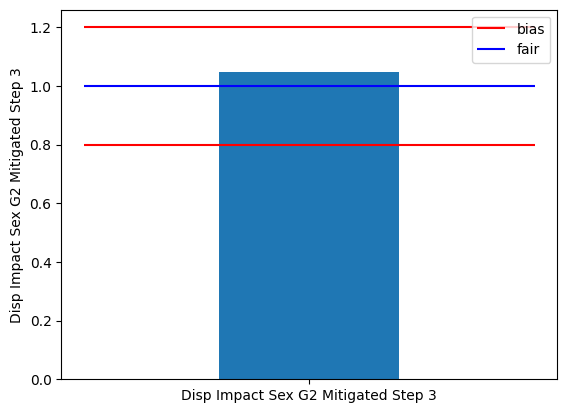

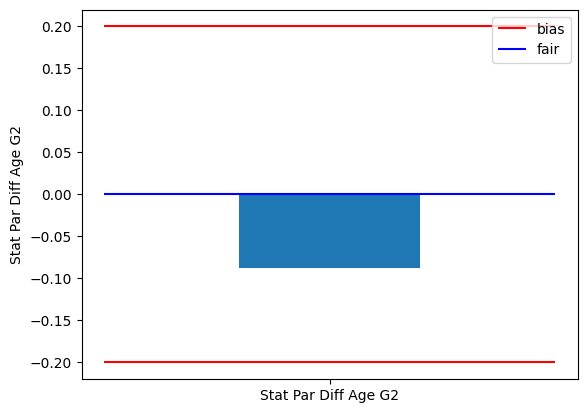

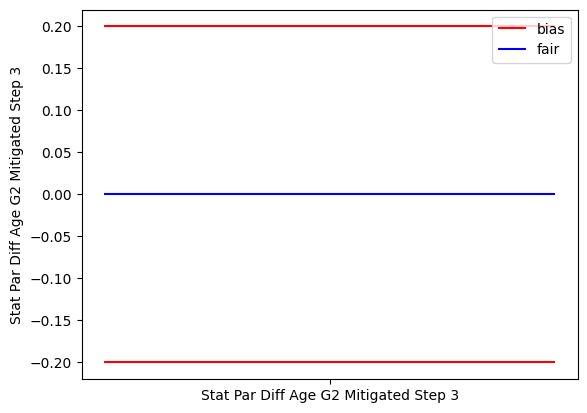

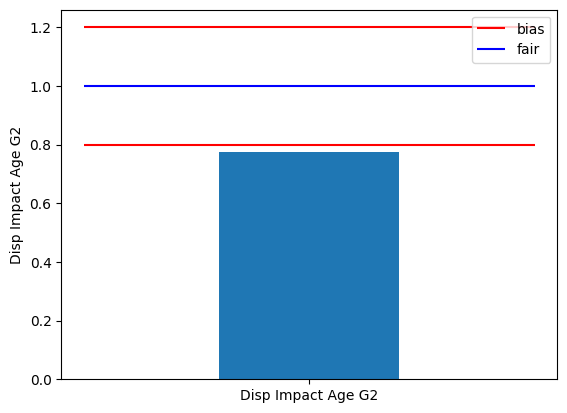

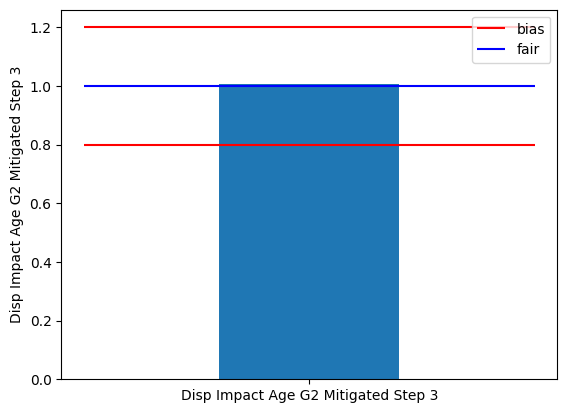

Explain which fairness metric (if any) is best and provide a justification for your answer 

In general, based on the plots, it seems that the bias mitigation in step 3 was the most effective across the board, due to the proximity of the fairness metric to what is considered fair within the plot, versus other bias mitigation steps. 

Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.
Did any group receive a positive advantage?
Was any group disadvantaged by these approaches?
What issues would arise if I used these methods to mitigate bias? 
 
Brad Dunham (dunhambrad7@gmail.com): 
The reweighting in step 3 mitigated bias for both age and sex unprivileged groups.  It is clear from both 
the disparate impact and statistical parity difference plots that the reweighting shifted the fairness metrics 
to be more fair. The bias mitigation techniques did not create a positive advantage for any groups.  The 
privileged groups had a positive 

In [9]:
print('Step 5:')

print('''Team members:
Brad Dunham (dunhambrad7@gmail.com)
David Strube (dstrube3@gatech.edu)
Brian Chung (bchung41@gatech.edu)
Ilyass Sfar (isfar3@gatech.edu)
''')

print()
print('Graph the results from applying the two fairness metrics on your privileged/unprivileged groups as derived from Step 3.2, 3.4, and 4.5')
stat_par_diff_plot(stat_par_diff_sex_g1, "Stat Par Diff Sex G1", 'statpardiffsexg1.png')
stat_par_diff_plot(stat_par_diff_sex_g1_transformed, "Stat Par Diff Sex G1 Mitigated Step 3", 'statpardiffsexg1transf.png')
stat_par_diff_plot(stat_par_diff_sex_g1_step4_transformed, "Stat Par Diff Sex G1 Mitigated Step 4", 'statpardiffsexg1transfstep4.png')

disp_impact_plot(disparate_impact_sex_g1, "Disp Impact Sex G1", 'disparateimpactsexg1.png')
disp_impact_plot(disparate_impact_sex_g1_transformed, "Disp Impact Sex G1 Mitigated Step 3", 'disparateimpactsexg1transformed.png')
disp_impact_plot(disparate_impact_sex_g1_step4_transformed, "Disp Impact Sex G1 Mitigated Step 4", 'disparateimpactsexg1transformedstep4.png')

stat_par_diff_plot(stat_par_diff_age_g1, "Stat Par Diff Age G1", 'statpardiffageg1.png')
stat_par_diff_plot(stat_par_diff_age_g1_transformed, "Stat Par Diff Age G1 Mitigated Step 3", 'statpardiffageg1transf.png')
stat_par_diff_plot(stat_par_diff_age_g1_step4_transformed, "Stat Par Diff Age G1 Mitigated Step 4", 'statpardiffageg1transfstep4.png')

disp_impact_plot(disparate_impact_age_g1, "Disp Impact Age G1", 'disparateimpactageg1.png')
disp_impact_plot(disparate_impact_age_g1_transformed, "Disp Impact Age G1 Mitigated Step 3", 'disparateimpactageg1transformed.png')
disp_impact_plot(disparate_impact_age_g1_step4_transformed, "Disp Impact Age G1 Mitigated Step 4", 'disparateimpactageg1transformedstep4.png')



stat_par_diff_plot(stat_par_diff_sex_g2, "Stat Par Diff Sex G2", 'statpardiffsexg2.png')
stat_par_diff_plot(stat_par_diff_sex_g2_transformed, "Stat Par Diff Sex G2 Mitigated Step 3", 'statpardiffsexg2transf.png')

disp_impact_plot(disparate_impact_sex_g2, "Disp Impact Sex G2", 'disparateimpactsexg2.png')
disp_impact_plot(disparate_impact_sex_g2_transformed, "Disp Impact Sex G2 Mitigated Step 3", 'disparateimpactsexg2transformed.png')

stat_par_diff_plot(stat_par_diff_age_g2, "Stat Par Diff Age G2", 'statpardiffageg2.png')
stat_par_diff_plot(stat_par_diff_age_g2_transformed, "Stat Par Diff Age G2 Mitigated Step 3", 'statpardiffageg2transf.png')

disp_impact_plot(disparate_impact_age_g2, "Disp Impact Age G2", 'disparateimpactageg2.png')
disp_impact_plot(disparate_impact_age_g2_transformed, "Disp Impact Age G2 Mitigated Step 3", 'disparateimpactageg2transformed.png')

print('Explain which fairness metric (if any) is best and provide a justification for your answer \n')
print('In general, based on the plots, it seems that the bias mitigation in step 3 was the most effective across the board, due to the proximity of the fairness metric to what is considered fair within the plot, versus other bias mitigation steps. \n')


print('''Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.
Did any group receive a positive advantage?
Was any group disadvantaged by these approaches?
What issues would arise if I used these methods to mitigate bias? \n ''')

print('Brad Dunham (dunhambrad7@gmail.com): ')
print('''The reweighting in step 3 mitigated bias for both age and sex unprivileged groups.  It is clear from both 
the disparate impact and statistical parity difference plots that the reweighting shifted the fairness metrics 
to be more fair. The bias mitigation techniques did not create a positive advantage for any groups.  The 
privileged groups had a positive advantage prior to the bias mitigation techniques and had a less positive 
advantage after the bias mitigation. The bias mitigation techniques did not create a disadvantage for any 
groups.  The unprivileged groups had a disadvantage prior to the bias mitigation techniques and had a less 
significant disadvantage after the bias mitigation. The issues that might arise from these methods is that 
they were tailored very specifically to the dataset provided and could possibly fall apart if applied to a 
different dataset where the privileged and unprivileged groups were swapped or some of the attributes used 
were not present''')
print()

print('David Strube (dstrube3@gatech.edu): ')
print('''In step 3, the statitistical parity difference (SPD) and disparate impact (DI) approaches both seemed to 
mitigate bias. The bias mitigation is demonstrated by the change in fairness by the fairness metrics. The sex 
privileged group Female and age privileged group Under 18 had positive advantages before bias mitigation but 
had less positive advantage after bias mitigation. The sex unprivileged group Male and the age unprivileged 
group 18 and Older had disadvantage prior to bias mitigation and less so after bias mitigation. Some issues 
that could arise from applying these bias mitigation approaches could be a public perception of bias against 
privileged groups, which may be a step towards fairness but could also be seen as perpetuating unfairness 
just in the other direction, two wrongs not making a right, but this would be a stretch. A more likely issue 
that could arise would be overfitting the approach in training data that turns out to not be as effective in 
real world data. Moreover, the size of the dataset we used could be too small to have an accurate view of 
what are the actual privileged and unprivileged groups, thus making our bias mitigation approaches misguided.''')
print()

print('Brian Chung (bchung41@gatech.edu): ')
print('''For G1, when we use the reweight pre-process to mitigate bias, both Statistical Parity Difference and 
Disparate Impact showed a higher fairness in the model with advantage to the privilege group for Sex (Female) 
and disadvantage to privilege group for Age (Under 18) after mitigation. While when we use our own method to 
mitigate bias, Sex has been improved for both fairness metrics, while Age fairness was slightly decreased for 
both metrics with disadvantage to the privileged group (Under 18). It is very hard to mitigate bias using 
either methods because we can't never make the model to be perfectly fair for all the protected classes or 
find the perfect balance, not to mention that when we mitigate bias it's a trade off of the accuracy.''')
print()

print('Ilyass Sfar (isfar3@gatech.edu): ')
print('''The most effective methods to mitigate bias, in general, were seen in the second half of part 3, with the 
usage of statistical parity and disparate impact. This can clearly be seen when all the methods for all steps 
are compared to the plot generated in step 5, where the plots landed close to what was considered fair. It 
should be noted in for the age variable and G2 scores in step 3, a perfect fairness score was achieved, using 
statistical parity, this gave an advantage to older people in the data set since they were initially 
disadvantaged in test scores. This was the only case of perfect fairness seen after bias mitigation, in all 
other cases, the fairness metric was on one group's side or the other, so there is always a slightly 
disadvantaged group, either through increasing the fairness for one group, or decreasing it for another. 
However, the fairness gap was made smaller through bias mitigation seen in the second half of step 3. ''')
print()